In [5]:
%matplotlib inline
import numpy as np 
import scipy as sp
import pandas as pd
import matplotlib as mpl
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import time
pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 100)
pd.set_option('display.notebook_repr_html', True)
import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("poster")

# What is probability?
Suppose you were to flip a coin. Then you expect not to be able to say whether the next toss would yield a heads or a tails. You might tell a friend that the odds of getting a heads is equal to to the odds of getting a tails, and that both are $1/2$.       
This intuitive notion of odds is a probability.

# Probability from a model
But now think of an event like an election, say a presidential election. You cant exactly run multiple trials of the election: its a one-off event. But you still want to talk about the likelyhood of a candidate winning. However people do make models of elections, based on inputs such as race, age, income, sampling polls, etc. They assign likeyhoods of candidates winning and run large numbers of simulations of the election, making predictions based on that. Forecasters like Nate Silver, Sam Wang, And Drew Linzer, made incredibly successfull predictions of the 2012 elections.                                                             
Or consider what a weather forecaster means when he or she says there is a 90% chance of rain today. Presumably, this conclusion has been made from many computer simulations which take in the weather conditions known in the past, and propagated using physics to the current day. The simulations give different results based on the uncertainty in the measurement of past weather, and the inability of the physics to capture the phenomenon exactly (all physics is some approximation to the natural world). But 90% of these simulations show rain.                                                                                              
In all of these cases, there is either a model (a fair coin, an election forecasting model, a weather differential equation), or an experiment ( a large number of coin tosses) that is used to estimate a probability, or the odds, of an event $E$ occuring.          
#Testing a model                                                                                                                    
We can test the model of a fair coin by having carried out a large number of coin flips. You would do, or imagine doing, a large number of flips or trials $N$, and finding the number of times you got heads $N_H$. Then the probability of getting heads would be $$\frac{N_H}{N}.$$                                                                                                                       
#Probability as frequency                                                                                                             
But, if you didnt know about the fairness of the coin, you can think of another notion probability as a relative frequency: if there are multiple ways an event like the tossing of a coin can happen, lets look at multiple trials of the event and see the fraction of times one or other of these ways happened.                                                                             
#Simulating the results of the model                                                                                               
We dont have a coin right now. So let us simulate this process on a computer. To do this we will use a form of the random number generator built into numpy. In particular, we will use the function np.random.choice, which will with equal probability for all items pick an item from a list (thus if the list is of size 6, it will pick one of the six list items each time, with a probability 1/6)

In [2]:
def throw_a_coin(N):
    return np.random.choice(['H','T'], size=N)
throws=throw_a_coin(40)
print "Throws:"," ".join(throws)
print "Number of Heads:", np.sum(throws=='H')
print "p1 = Number of Heads/Total Throws:", np.sum(throws=='H')/40.

Throws: T H T T T H H T T T T T H H T H T T T H H H T H H H T T T T H T T H H T T T H T
Number of Heads: 16
p1 = Number of Heads/Total Throws: 0.4


In [3]:
throws=throw_a_coin(40)
print "Throws:"," ".join(throws)
print "Number of Heads:", np.sum(throws=='H')
print "p2 = Number of Heads/Total Throws:", np.sum(throws=='H')/40.                                                                                                                       

Throws: T H T H H H H T T H T T H T H T H T H H H H T H T T H T H H T H H T H H T H H H
Number of Heads: 24
p2 = Number of Heads/Total Throws: 0.6


In [4]:
throws=throw_a_coin(10000)
print "First 1000 Throws:"," ".join(throws)[:1000]
print "Number of Heads:", np.sum(throws=='H')
print "p for 10,000 = Number of Heads/Total Throws:", np.sum(throws=='H')/10000.

First 1000 Throws: T T T T H H H T T T H T H H T T H T H T T T H T T H T T H H H H T T T T H H T H T H T H T H H H H T H H H T H T T T T T T T H H T H H T T H H T T T H T T T T T T H H H H T T H H H H H H T H H H T H T H H T T T T T T T T H H H T T H T H T H H T T T T T H H H T H H T T H H T H T T T T T T H T H T T T T H T T H H T H H H H T H H T T T T T T H H T T T T H H H H T T T T T T T T T T T H T T T H H H T H T T T H H H T T H H T T H H T T T H H T H H H T T H H H H T H T T H H T H T H H H H T T T T H H H T T H H H T T T H H H H H H T T H H T H T T H T H H H T T H H T T T H H H T H T T H T H T H T T T T T T T T H H H H H H T T H H H H T T T T H T T H T T H H T H H T H H H T T T T H T H H T T T T T H H H T T H H T T T T T T T H T T T H H T T H H H T H H T T H H T T T T H H H H T T T T H H H H T T T T T H T T T H T T H T H T H T H T H T H T H T T T T T T H H T T H T H H T H T H T H T H H H H H T H H T H T T H H H H H T T H H H H T T T H T T H T H T T T T H H H H H T T H H T T T T H

The larger number of trials we do, the closer we seem to get to half the tosses showing up heads. Lets see this more systematically:

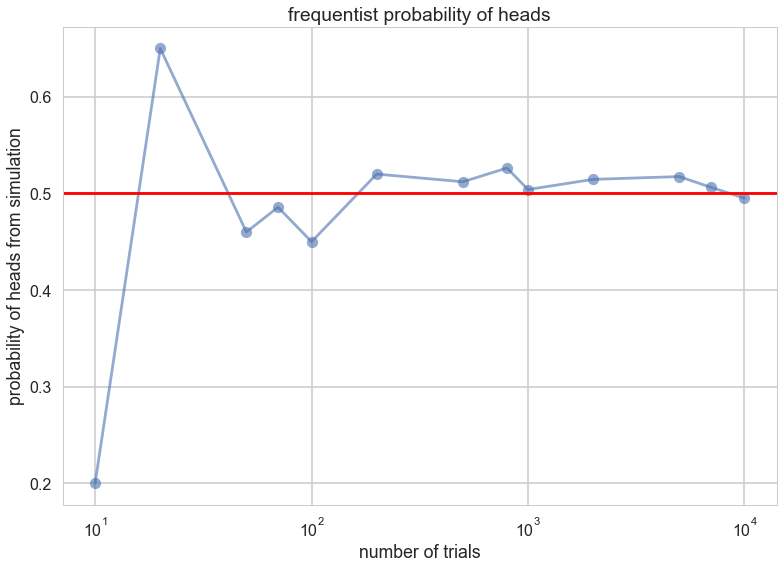

In [5]:
trials=[10, 20, 50, 70, 100, 200, 500, 800, 1000, 2000, 5000, 7000, 10000]
plt.plot(trials, [np.sum(throw_a_coin(j)=='H')/np.float(j) for j in trials], 'o-', alpha=0.6);
plt.xscale("log")
plt.axhline(0.5, 0, 1, color='r');
plt.xlabel('number of trials');
plt.ylabel('probability of heads from simulation');
plt.title('frequentist probability of heads');

Thus, the true odds fluctuate about their long-run value of 0.5, in accordance with the model of a fair coin (which we encoded in our simulation by having np.random.choice choose between two possibilities with equal probability), with the fluctuations becoming much smaller as the number of trials increases. These fluctations are what give rise to probability distributions.        
Each finite length run is called a sample, which has been obtained from the generative model of our fair coin. Its called generative as we can use the model to generate, using simulation, a set of samples we can play with to understand a model.

# A simple Election Model

In [6]:
predictwise = pd.read_csv('D:\Machine Learning/predictwise.csv').set_index('States')
predictwise.head()

,Obama,Romney,Votes
States,,,
Alabama,0.000,1.000,9
Alaska,0.000,1.000,3
Arizona,0.062,0.938,11
Arkansas,0.000,1.000,6
California,1.000,0.000,55


Remember that simulation is used in different ways in the modelling process. Simulations might be used to propagate differential equations which describe the weather from different initial conditions. In this case they are used to create the model. In the coin flips case, they are used to illustrate the predictions of the model of a fair coin. This example is in the same spirit: we are given a (somehow obtained) list of win probabilities for the states of the US.

In the case of the tossed coins, even though we had a model which said that the probability of heads was 0.5, there were sequences of flips in which more or less than half the flips were heads. Similarly, here, if the probability of Romney winning in Arizona is 0.938, it means that if somehow, there were 10000 replications with an election each, Romney would win in 938 of those Arizonas on the average across the replications. And there would be some samples with Romney winning more, and some with less. We can run these simulated universes on a computer though not in real life

# Simulating Model

To do this, we will assume that the outcome in each state is the result of an independent coin flip whose probability of coming up Obama is given by the Predictwise state-wise win probabilities. Lets write a function simulate_election that uses this predictive model to simulate the outcome of the election given a table of probabilities.

In the code below, each column simulates a single outcome from the 50 states + DC by choosing a random number between 0 and 1. Obama wins that simulation if the random number is < the win probability. If he wins that simulation, we add in the electoral votes for that state, otherwise we dont. We do this n_sim times and return a list of total Obama electoral votes in each simulation.

In [1]:
def simulate_election(model, n_sim):
    simulations = np.random.uniform(size=(51, n_sim))
    obama_votes = (simulations < model.Obama.values.reshape(-1, 1)) * model.Votes.values.reshape(-1, 1)
    #summing over rows gives the total electoral votes for each simulation
    return obama_votes.sum(axis=0)

In [7]:
result = simulate_election(predictwise, 10000)
print (result >= 269).sum()

9958


In [8]:
result

array([332, 306, 326, ..., 312, 318, 279], dtype=int64)

There are roughly only 50 simulations in which Romney wins the election!

# Displaying the prediction

In [10]:
def plot_simulation(simulation):    
    plt.hist(simulation, bins=np.arange(200, 538, 1), 
             label='simulations', align='left', normed=True)
    plt.axvline(332, 0, .5, color='r', label='Actual Outcome')
    plt.axvline(269, 0, .5, color='k', label='Victory Threshold')
    p05 = np.percentile(simulation, 5.)
    p95 = np.percentile(simulation, 95.)
    iq = int(p95 - p05)
    pwin = ((simulation >= 269).mean() * 100)
    plt.title("Chance of Obama Victory: %0.2f%%, Spread: %d votes" % (pwin, iq))
    plt.legend(frameon=False, loc='upper left')
    plt.xlabel("Obama Electoral College Votes")
    plt.ylabel("Probability")
    sns.despine()

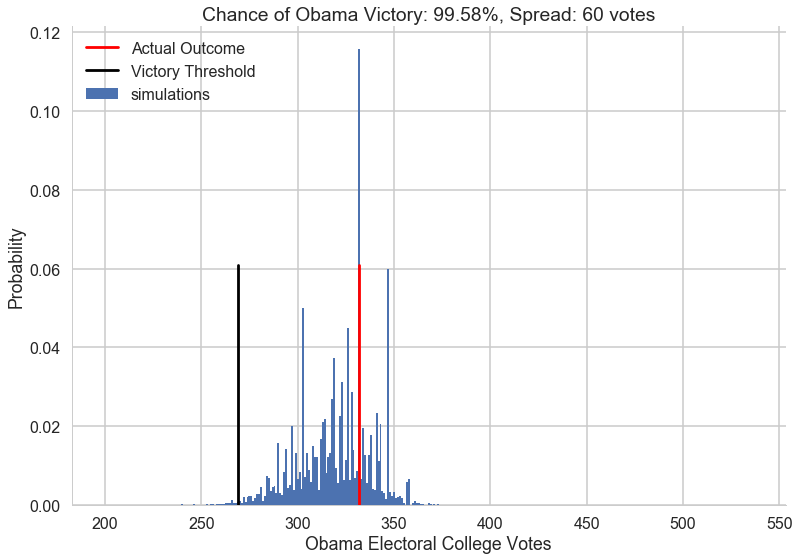

In [11]:
plot_simulation(result)

The model created by combining the probabilities we obtained from Predictwise with the simulation of a biased coin flip corresponding to the win probability in each states leads us to obtain a histogram of election outcomes. We are plotting the probabilities of a prediction, so we call this distribution over outcomes the predictive distribution. Simulating from our model and plotting a histogram allows us to visualize this predictive distribution. In general, such a set of probabilities is called a probability distribution or probability mass function

# Random Variable

 In probability theory, the sample space of an experiment or random trial is the set of all possible outcomes or results of that experiment. For one coin toss, [H,T] make up the sample space.

A random variable is a mapping from a sample space to the set of real numbers. It assigns a real number to each outcome in the sample space

For example, consider the event of a coin toss that we have seen before. There are two outcomes in the sample space, a heads and a tails. We can ask the question, whats the probability of a heads or a tails? For an unbiased coin, these are, by symmettry, 1/2 each. The random variable here is the number of heads, and its probability is P(0)=1/2, and P(1)=1/2.

Another random variable is the number of heads in two coin tosses. There, P(0)=1/4, P(1)=1/2, P(2)=1/4.

Random variables provide the link from events and sample spaces to data, and it is their probability distribution that we are interested in

A random variable is called discrete if it has a countable number of values ^[The technical definition of countable is that there is a 1-1 correspondence with the integers 1,2,3...]. The number of heads in 2 coin tosses is a discrete random variable.

# Bernoulli Random Variables (in scipy.stats)

The Bernoulli Distribution represents the distribution for coin flips. Let the random variable X represent such a coin flip, where X=1 is heads, and X=0 is tails. Let us further say that the probability of heads is p (p=0.5 is a fair coin).

We then say:

#                                                    X ~ Bernoulli(p)

which is to be read as X has distribution Bernoulli(p). The probability distribution function (pdf) or probability mass function associated with the Bernoulli distribution is

                                                  P(X=1)=p                                                                                                                         P(X=0)=1-p     

for p in the range 0 to 1. The pdf, or the probability that random variable $X=x$ may thus be written as

                                               P(X=x)={p^x}*{(1-p)^(1-x)}

for x in the set {0,1}.

Let us engage in some term defining right now. $X$ is a random variable, and when we say $X=x$ we are asking "what if the random variable X takes the value x. $P(X=x)$ asks: what is the probability that the random variable X takes the value x. Finally $p$ is a parameter of the Bernoulli distribution, and as we have seen, one of the things we want to do in data analysis is: having seen some data, what can we infer to be the values of p, so that we can make future predictions for X.

In [13]:
from scipy.stats import bernoulli
#bernoulli random variable
brv=bernoulli(p=0.3)
brv.rvs(size=20)

array([0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0])

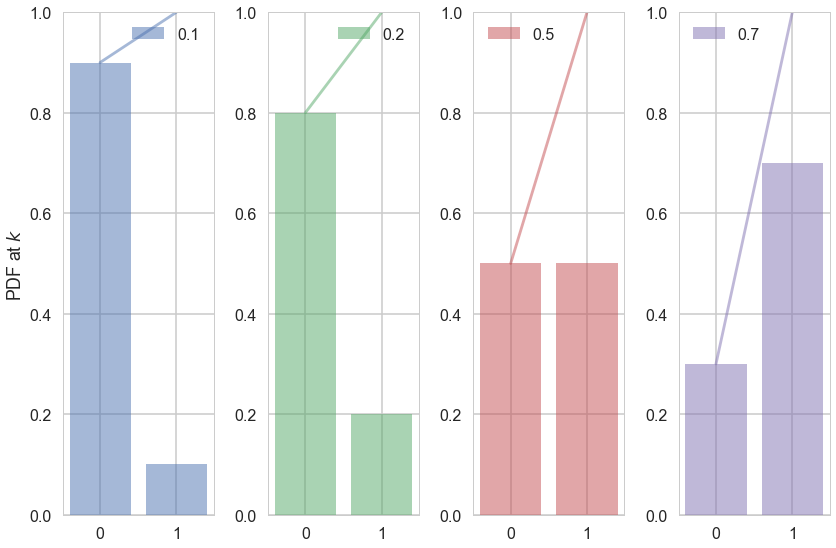

In [14]:
event_space=[0,1]
plt.figure(figsize=(12,8))
colors=sns.color_palette()
for i, p in enumerate([0.1, 0.2, 0.5, 0.7]):
    ax = plt.subplot(1, 4, i+1)
    plt.bar(event_space, bernoulli.pmf(event_space, p), label=p, color=colors[i], alpha=0.5)
    plt.plot(event_space, bernoulli.cdf(event_space, p), color=colors[i], alpha=0.5)

    ax.xaxis.set_ticks(event_space)
   
    plt.ylim((0,1))
    plt.legend(loc=0)
    if i == 0:
        plt.ylabel("PDF at $k$")
plt.tight_layout()

# Uniform Distribution (in numpy)

The first thing to pick up on here is that np.random.uniform gives you a random number between 0 and 1, uniformly. In other words, the number is equally likely to be between 0 and 0.1, 0.1 and 0.2, and so on. This is a very intuitive idea, but it is formalized by the notion of the Uniform Distribution.

We then say:                        X ~ Uniform([0,1])

which is to be read as X has distribution Uniform([0,1]). The probability distribution function (pdf) associated with the Uniform distribution is

                                       P(X=x) = 1 for x belongs to [0,1]                                                     
                                       P(X=x) = 0 for x not belongs to [0,1]

What assigning the vote to Obama when the random variable drawn from the Uniform distribution is less than the Predictwise probability of Obama winning (which is a Bernoulli Parameter) does for us is this: if we have a large number of simulations and $p_{Obama}=0.7$ , then 70\% of the time, the random numbers drawn will be below 0.7. And then, assigning those as Obama wins will how to the frequentist notion of probability of the Obama win. But remember, of course, that in 30% of the simulations, Obama wont win, and this will induce fluctuations and a distribution on the total number of electoral college votes that Obama gets. And this is what we see in the histogram below.

# Empirical Distribution

This is an empirical Probability Mass Function or Probability Density Function. The word density is strictly used when the random variable X takes on continuous values, as in the uniform distribution, rather than discrete values such as here, but we'll abuse the language and use the word probability distribution in both cases.

Lets summarize: the way the density arose here that we did ran 10,000 tosses (for each state), and depending on the value, assigned the state to Obama or Romney, and then summed up the electoral votes over the states.

There is a second, very useful question, we can ask of any such probability density: what is the probability that a random variable is less than some value. In other words: P(X < x). This is also a probability distribution and is called the Cumulative Distribution Function, or CDF (sometimes just called the distribution, as opposed to the density). Its obtained by "summing" the probability density function for all $X$ less than $x$.

In [15]:
CDF = lambda x: np.float(np.sum(result < x))/result.shape[0]
for votes in [200, 300, 320, 340, 360, 400, 500]:
    print "Obama Win CDF at votes=", votes, " is ", CDF(votes)

Obama Win CDF at votes= 200  is  0.0
Obama Win CDF at votes= 300  is  0.1504
Obama Win CDF at votes= 320  is  0.4533
Obama Win CDF at votes= 340  is  0.842
Obama Win CDF at votes= 360  is  0.9969
Obama Win CDF at votes= 400  is  1.0
Obama Win CDF at votes= 500  is  1.0


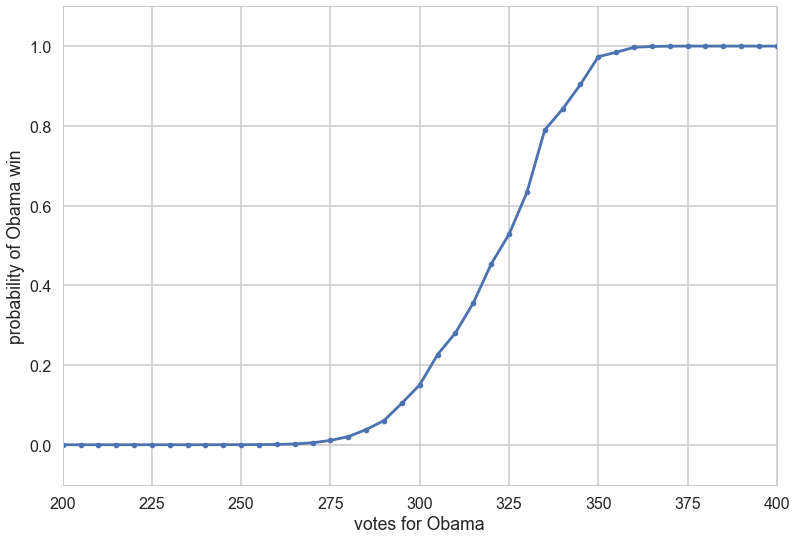

In [16]:
votelist=np.arange(0, 540, 5)
plt.plot(votelist, [CDF(v) for v in votelist], '.-');
plt.xlim([200,400])
plt.ylim([-0.1,1.1])
plt.xlabel("votes for Obama")
plt.ylabel("probability of Obama win");

# Binomial Distribution (in scipy.stats)

P(X=k;n,p)=(nCk)(p^k){(1-p)^(1-k)}

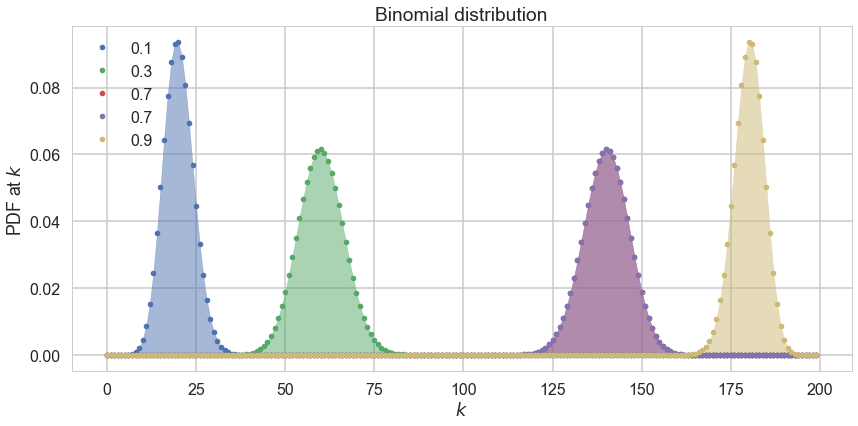

In [17]:
from scipy.stats import binom
plt.figure(figsize=(12,6))
k = np.arange(0, 200)
for p, color in zip([0.1, 0.3, 0.7, 0.7, 0.9], colors):
    rv = binom(200, p)
    plt.plot(k, rv.pmf(k), '.', lw=2, color=color, label=p)
    plt.fill_between(k, rv.pmf(k), color=color, alpha=0.5)
q=plt.legend()
plt.title("Binomial distribution")
plt.tight_layout()
q=plt.ylabel("PDF at $k$")
q=plt.xlabel("$k$")

# The various ways to get random numbers

1.  np.random.choice chooses items randomly from an array, with or without replacement
2.  np.random.random gives us uniform randoms on [0.0,1.0)
3.  np.random.randint gives us random integers in some range
4.  np.random.randn gives us random samples from a Normal distribution, which we talk about later.
5.  scipy.stats.distrib gives us stuff from a distribution. Here distrib could be binom for example, as above. distrib.pdf or    distrib.pmf give us the density or mass function, while cdf gives us the cumulative distribution function. Just using distrib as a function with its params creates a random variable generating object, from which random variables can be generated in the form distrib(params).rvs(size).